# Desafio de Ciência de Dados do Programa Lighthouse

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

**Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema**.

## Etapa 1: Análise Exploratória dos Dados (EDA)

### 1.1 Compreensão Inicial dos Dados

In [2]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Leitura dos dados
url = 'https://drive.google.com/uc?id=122b3O7GoH2pouBcx411M1h0qegZytNpo'
df = pd.read_csv(url)

In [4]:
# Verificando a base de dados
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


#### Dicionário dos Dados:
id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo  
nome - Representa o nome do anúncio  
host_id - Representa o id do usuário que hospedou o anúncio  
host_name – Contém o nome do usuário que hospedou o anúncio  
bairro_group - Contém o nome do bairro onde o anúncio está localizado  
bairro - Contém o nome da área onde o anúncio está localizado  
latitude - Contém a latitude do local  
longitude - Contém a longitude do local  
room_type – Contém o tipo de espaço de cada anúncio  
price - Contém o preço por noite em dólares listado pelo anfitrião  
minimo_noites - Contém o número mínimo de noites que o usuário deve reservar  
numero_de_reviews - Contém o número de comentários dados a cada listagem  
ultima_review - Contém a data da última revisão dada à listagem  
reviews_por_mes - Contém o número de avaliações fornecidas por mês  
calculado_host_listings_count - Contém a quantidade de listagem por host  
disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

In [5]:
# Total de linhas e colunas
df.shape

(48894, 16)

In [6]:
# Tipo de dado armazenado em cada coluna
df.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

In [7]:
# Convertendo o campo ultima_review para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

In [8]:
df.dtypes

id                                        int64
nome                                     object
host_id                                   int64
host_name                                object
bairro_group                             object
bairro                                   object
latitude                                float64
longitude                               float64
room_type                                object
price                                     int64
minimo_noites                             int64
numero_de_reviews                         int64
ultima_review                    datetime64[ns]
reviews_por_mes                         float64
calculado_host_listings_count             int64
disponibilidade_365                       int64
dtype: object

In [9]:
# Consultando as áreas dos anúncios
df['bairro_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
# Consultando tipos de espaço
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [11]:
# Informações estatísticas do conjunto de dados
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Podemos notar que o preço em dólar por noite apresentou o valor mínimo de 0, o que representa um dado inconsistente que devemos tratar. Isso porque não é possível que a base de anúncios possua algum imóvel cadastrado sem o valor de preço.

Para corrigir essa inconsistência, vamos adotar a estratégia de substituição dos preços iguais a 0 pela média de preço do seu respectivo bairro (bairro_group), que será feita na etapa a seguir.

### 1.2 Limpeza e Tratamento dos Dados:

#### 1.2.1 Tratamento de Valores Duplicados e Nulos

In [12]:
# Consultar anúncios com preço por noite igual a 0
price_zero_listings = df[df['price'] == 0]
price_zero_listings.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


In [13]:
# Consultando número de anúncios com preço 0
price_zero_listings_count = len(price_zero_listings)
print(price_zero_listings_count)

11


In [14]:
# Calculando a média de preços de cada bairro
average_prices_by_neighborhood = df[df['price'] != 0].groupby('bairro_group')['price'].mean().astype(int)
print(average_prices_by_neighborhood)

bairro_group
Bronx             87
Brooklyn         124
Manhattan        196
Queens            99
Staten Island    114
Name: price, dtype: int64


In [15]:
# Substituindo os preços iguais a 0 pela média do respectivo bairro
for bairro in average_prices_by_neighborhood.index:
    df.loc[(df['price'] == 0) & (df['bairro_group'] == bairro), 'price'] = average_prices_by_neighborhood[bairro]

In [16]:
# Consultando novas métricas estatísticas do dataset
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.749376,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.146278,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Agora é possível constatar que não existem mais anúncios com preço igual a zero, sendo o novo valor mínimo de preço igual a 10 dólares.

In [17]:
# Verificando valores duplicados
duplicates = df.duplicated()
duplicates.sum()

0

In [18]:
# Consultando campos com valores nulos
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Considerando que temos um dataset com 48.894 dados e que apenas 16 anúncios não possuem a descrição de nome, vamos seguir com a exclusão desses dados, pois representa uma perda pouco significativa para a análise.

Já com relação aos 21 dados sem 'host_name', vamos apenas atualizar esse campo com o valor 'Unknown' do tipo object, pois se trata de um campo com baixa relevância para a análise que estamos conduzindo.

No que se refere aos campos 'ultima_review' e 'reviews_por_mes', a grande quantidade de dados ausentes sugere que esses imóveis podem nunca ter sido alugados ou revisados. Portanto, adotaremos como estratégia subtituir por zero os valores nulos do campo 'reviews_por_mes' e substituir pela data mais antiga de review os valores nulos do campo 'ultima_review'.

In [19]:
# Removendo os dados sem nome
df.dropna(subset=['nome'], inplace=True)

In [20]:
# Substituindo valores nulos de host_name por 'Unknown'
df['host_name'].fillna('Unknown', inplace=True)

In [21]:
# Substituindo valores nulos de reviews_por_mes por 0.0
reviews_por_mes: df['reviews_por_mes'].fillna(0, inplace=True)

In [22]:
older_date = df['ultima_review'].min()
print(older_date)

2011-03-28 00:00:00


In [23]:
# Substituindo valores nulos de ultima_review pela data mais antiga do dataset
ultima_review: df['ultima_review'].fillna(df['ultima_review'].min(), inplace=True)

In [24]:
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [25]:
df.shape

(48878, 16)

In [26]:
# Resetando o index do dataset
df.reset_index(drop=True, inplace=True)

#### 1.2.2 Detecção e Tratamento de Outliers

Para a detecção e tratamento de outliers no conjunto de dados, foi adotado o método do **Intervalo Interquartil (IQR - Interquartile Range)**, que é uma técnica comumente usada para identificar e tratar valores atípicos em um conjunto de dados. O IQR mede a dispersão estatística ao dividir um conjunto de dados em quartis, por meio da diferença entre o terceiro (Q3) e o primeiro quartil (Q1).

Assim, primeiramente, vamos analisar por meio de histogramas a distribuição das variáveis numéricas do nosso conjunto de dados para validar a possível presença de outliers.

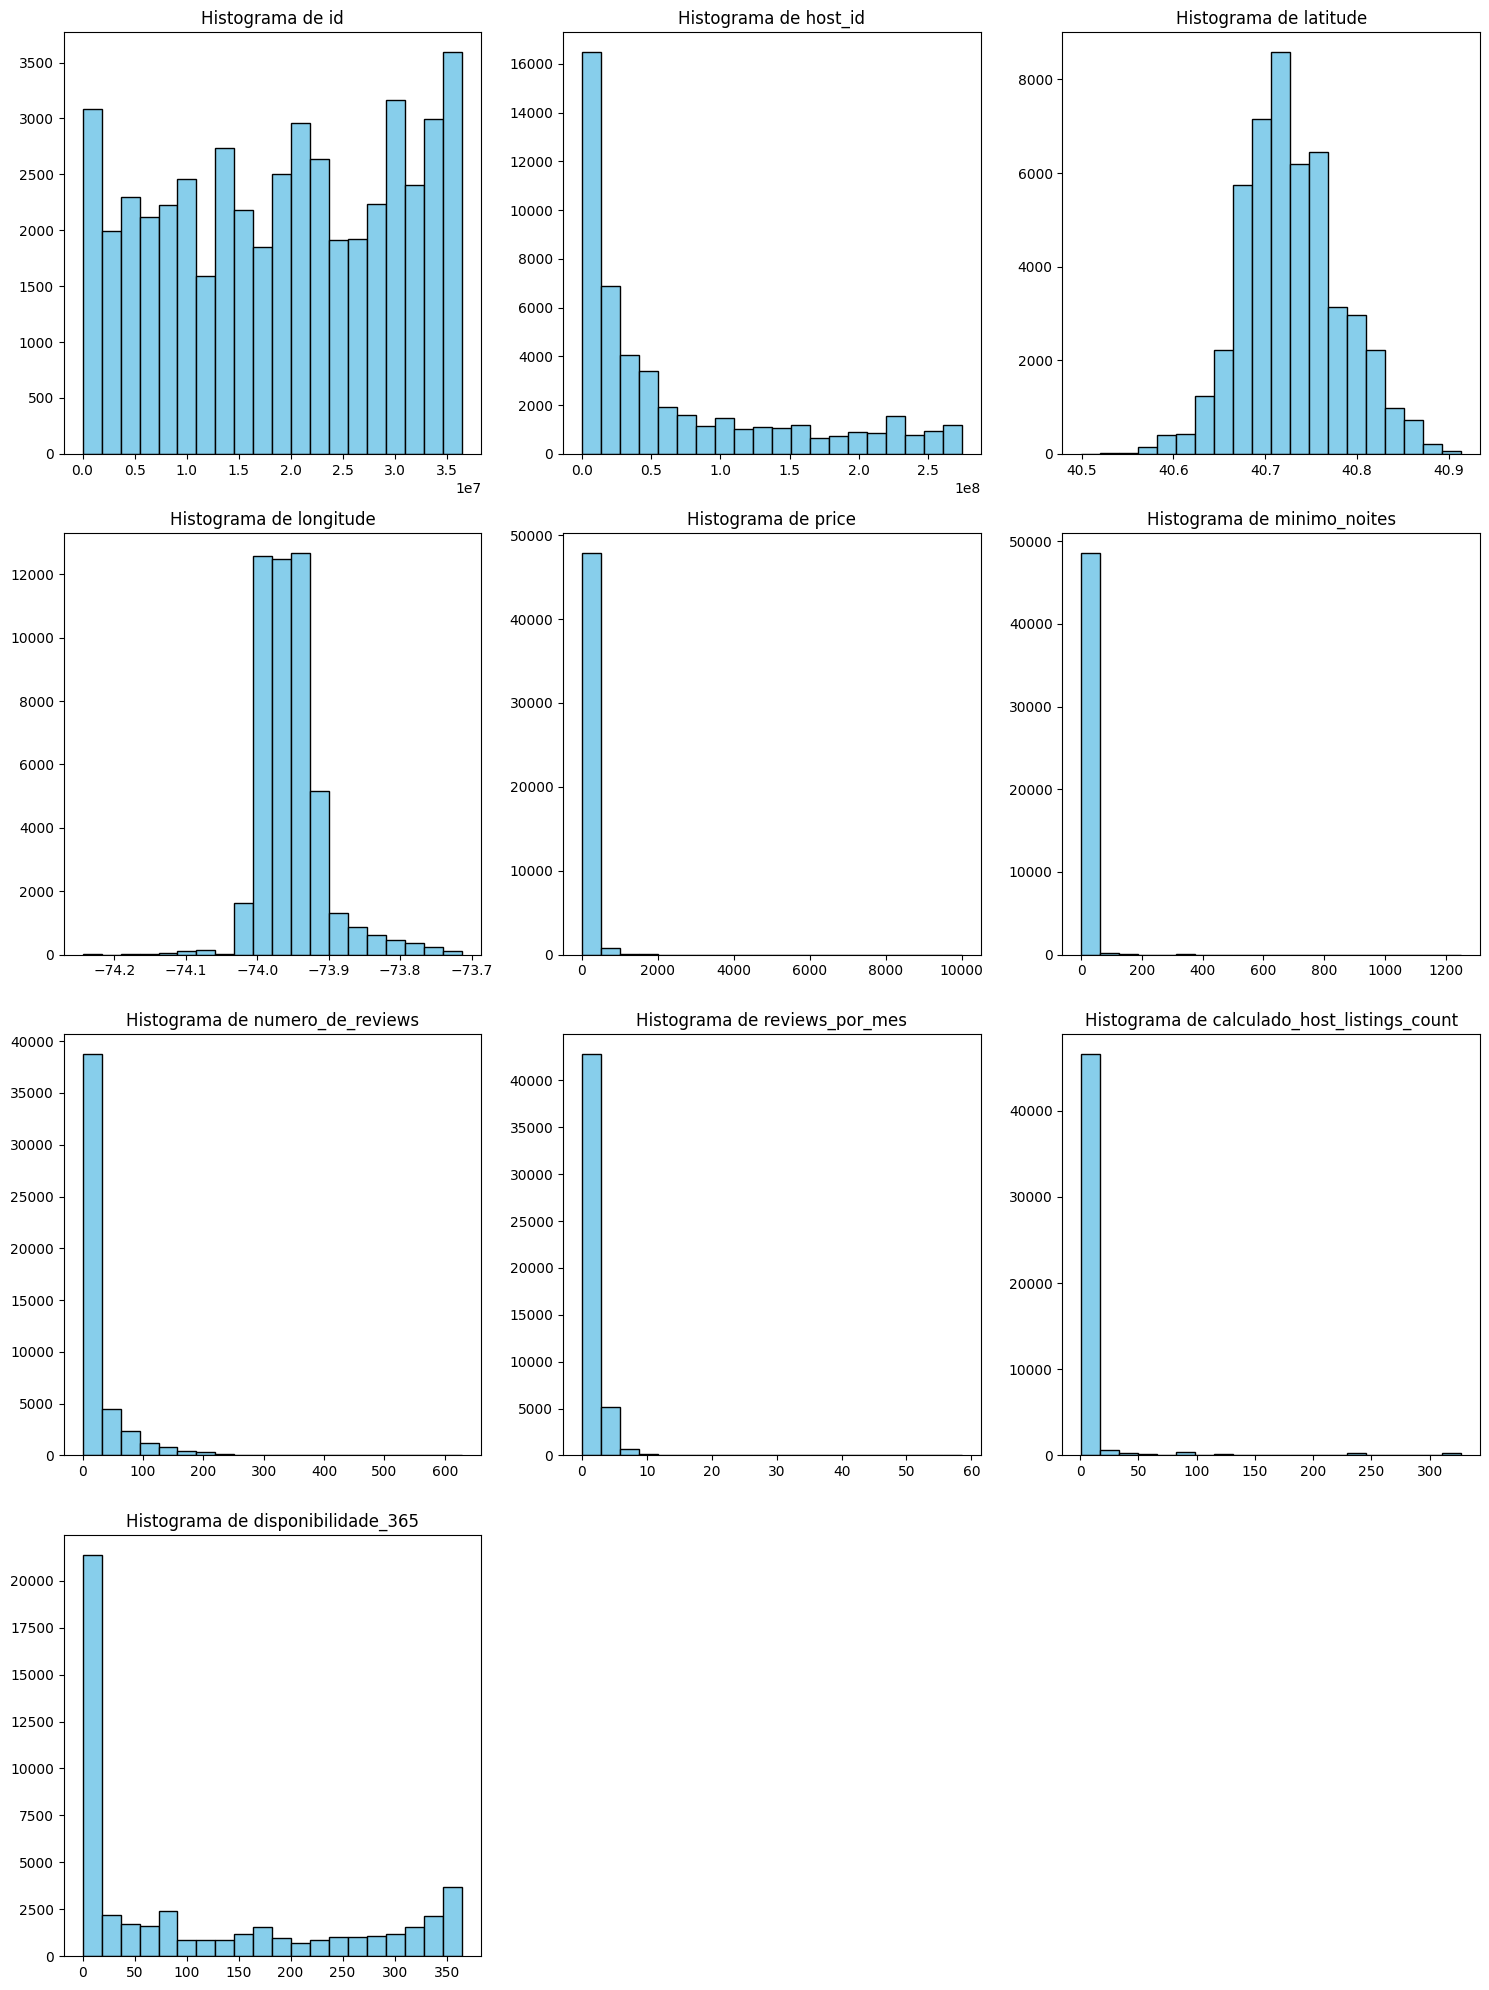

In [32]:
# Identificando colunas numéricas
numerical = df.select_dtypes(include=['float64', 'int64']).columns

# Número de colunas numéricas
numerical_vars = len(numerical)

# Definindo o número de colunas e linhas para os subplots
num_lines = int(np.ceil(numerical_vars / 3))
num_cols = min(numerical_vars, 3)

# Criando subplots
fig, axs = plt.subplots(num_lines, num_cols, figsize=(5 * num_cols, 5 * num_lines))

# Ajustando axs para ser um array bidimensional
if num_lines * num_cols > 1:
    axs = axs.ravel()
else:
    axs = [axs]

# Plotando os histogramas
for i, col in enumerate(numerical):
    axs[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histograma de {col}')

# Desativando subplots extras
for j in range(i + 1, num_lines * num_cols):
    axs[j].axis('off')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

Com base nos histogramas acima, verificamos que de fato existem valores discrepantes no dataset, em especial nas variáveis 'price' e 'minimo-noites'. Esses outliers distorcerão o modelo a ser construído posteriormente caso não sejam tratados. Portanto, levaremos em consideração apenas os valores de 'price' e 'minimo-noites' que estejam dentro do intervalo definido pelo método IQR.

Para seguir com o tratamento dos outliers, vamos calcular o IQR para cada uma das variáveis a serem limpas, bem como definiremos seus respectivos limites superior e inferior para remover os outliers do dataset.

> **Nota:** As variáveis 'numero_de_reviews', 'calculado_host_listings_count' e 'disponibilidade_365' também podem conter outliers, mas com menor significância para a análise. Por isso não vamos considerá-las nesse tratamento.

Primeiramente, vamos dar uma olhada novamente nas estatíscas da variável 'price':

In [33]:
with pd.option_context('float_format', '{:f}'.format): print(df["price"].describe())

count   48878.000000
mean      152.751054
std       240.178911
min        10.000000
25%        69.000000
50%       106.000000
75%       175.000000
max     10000.000000
Name: price, dtype: float64


Como os valores de preço por noite variam de 10 a 10.000 dólares com um valor médio de apenas 152,75, temos um indício de que podem haver outliers em nosso dataset. Portanto, vamos aplicar o método IQR na coluna 'price'.

In [34]:
# Identificando outliers da variável 'price'

# Calculando Q1 e Q3
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)

# Calculando IQR
IQR_price = Q3_price - Q1_price
print(f'Primeiro Quartil (Q1): {Q1_price}\nTerceiro Quartil (Q3): {Q3_price}\nIntervalo Interquartil (IQR): {IQR_price}')

# Definindo os limites
inf_price = Q1_price - 1.5 * IQR_price
sup_price = Q3_price + 1.5 * IQR_price
print(f'\nLimite inferior de price: {inf_price}\nLimite superior de price: {sup_price}')

Primeiro Quartil (Q1): 69.0
Terceiro Quartil (Q3): 175.0
Intervalo Interquartil (IQR): 106.0

Limite inferior de price: -90.0
Limite superior de price: 334.0


Nota-se que o limite inferior para 'price' é negativo, o que indica que não temos outliers na parte inferior da distribuição dos dados de preço. Logo, precisamos apenas garantir que os valores de preço estejam dentro do limite superior para que os dados mantenham a sua representatividade. Portanto, vamos verificar a quantidade de anúncios que devemos excluir do dataset.

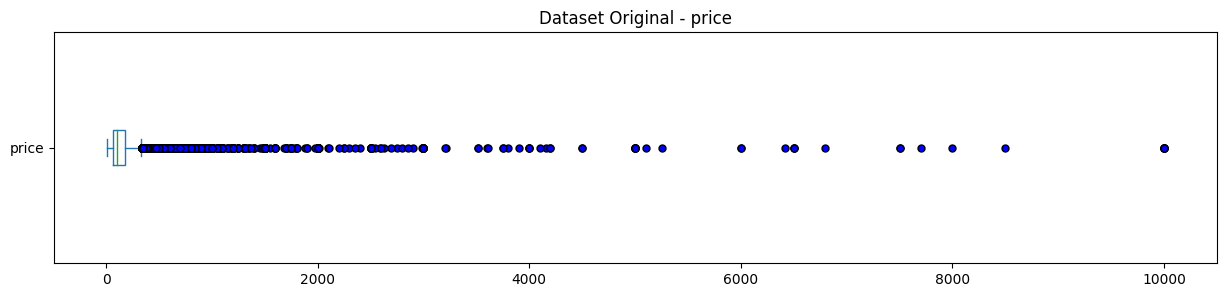

O dataset possui 48878 anúncios
sendo 2971 entradas acima de 334.0
que representam 6.08% do dataset


In [36]:
# Verificando o dataset original para 'price'
fig, ax = plt.subplots(figsize=(15,3))
flierprops = dict(marker='o', markerfacecolor='blue', markersize=5,
                  linestyle='none', markeredgecolor='black')
df.price.plot(kind='box', vert=False, flierprops=flierprops)
ax.set_title('Dataset Original - price')
plt.show()

print('O dataset possui {} anúncios'.format(df.shape[0]))
print('sendo {} entradas acima de 334.0'.format(len(df[df.price > 334])))
print('que representam {:.2f}% do dataset'.format((len(df[df.price > 334]) / df.shape[0])*100))

In [37]:
# Identificando outliers da variável 'minimo_noites'

# Calculando Q1 e Q3
Q1_noites = df['minimo_noites'].quantile(0.25)
Q3_noites = df['minimo_noites'].quantile(0.75)

# Calculando IQR
IQR_noites = Q3_noites - Q1_noites
print(f'Primeiro Quartil (Q1): {Q1_noites}\nTerceiro Quartil (Q3): {Q3_noites}\nIntervalo Interquartil (IQR): {IQR_noites}')

# Definindo os limites
inf_noites = Q1_noites - 1.5 * IQR_noites
sup_noites = Q3_noites + 1.5 * IQR_noites
print(f'\nLimite inferior de minimo_noites: {inf_noites}\nLimite superior de minimo_noites: {sup_noites}')

Primeiro Quartil (Q1): 1.0
Terceiro Quartil (Q3): 5.0
Intervalo Interquartil (IQR): 4.0

Limite inferior de minimo_noites: -5.0
Limite superior de minimo_noites: 11.0


Podemos notar novamente que o limite inferior para 'minimo_noites' é negativo, o que indica que não temos outliers na parte inferior da distribuição dos dias mínimos para reserva. Assim, precisamos apenas garantir que os valores de 'minimo_noites' estejam dentro do limite superior para que os dados mantenham a sua representatividade. Portanto, vamos verificar a quantidade de anúncios que devemos excluir do dataset.

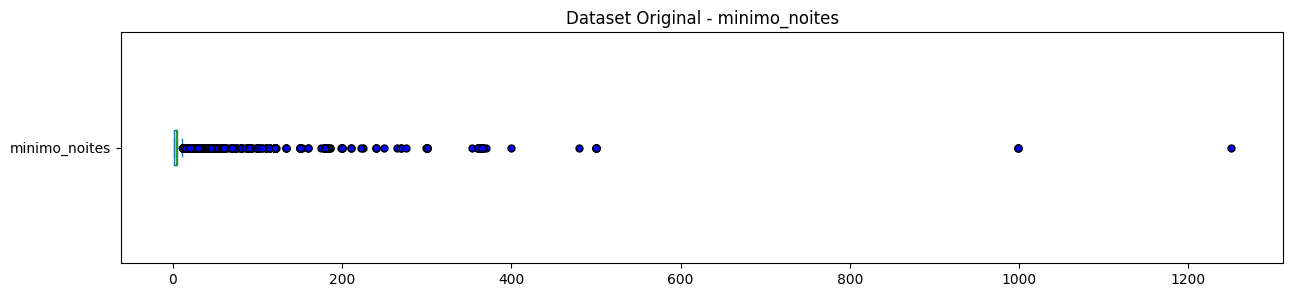

O dataset possui 48878 anúncios
sendo 6606 entradas acima de 11.0
que representam 13.52% do dataset


In [38]:
# Verificando o dataset original para 'minimo_noites'
fig, ax = plt.subplots(figsize=(15,3))
flierprops = dict(marker='o', markerfacecolor='blue', markersize=5,
                  linestyle='none', markeredgecolor='black')
df.minimo_noites.plot(kind='box', vert=False, flierprops=flierprops)
ax.set_title('Dataset Original - minimo_noites')
plt.show()

print('O dataset possui {} anúncios'.format(df.shape[0]))
print('sendo {} entradas acima de 11.0'.format(len(df[df.minimo_noites > 11])))
print('que representam {:.2f}% do dataset'.format((len(df[df.minimo_noites > 11]) / df.shape[0])*100))

Agora que já sabemos quais valores discrepantes devemos remover do dataset, podemos prosseguir com a exclusão adequada desses dados.

In [39]:
# Deletando os outliers do dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 334].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimo_noites > 11].index, axis=0, inplace=True)

print('Shape antes da remoção de outliers: ', df.shape)
print('Shape após a remoção de outliers: ', df_clean.shape)

Shape antes da remoção de outliers:  (48878, 16)
Shape após a remoção de outliers:  (39722, 16)


Ao todo, foram removidos do dataset **9.156 anúncios** com valores discrepantes de preço por noite e dias mínimos para reserva, o que representa apenas **18,7%** do conjunto de dados original.

Agora vamos verificar como ficou a distribuição das variáveis após essa modificação do dataset.

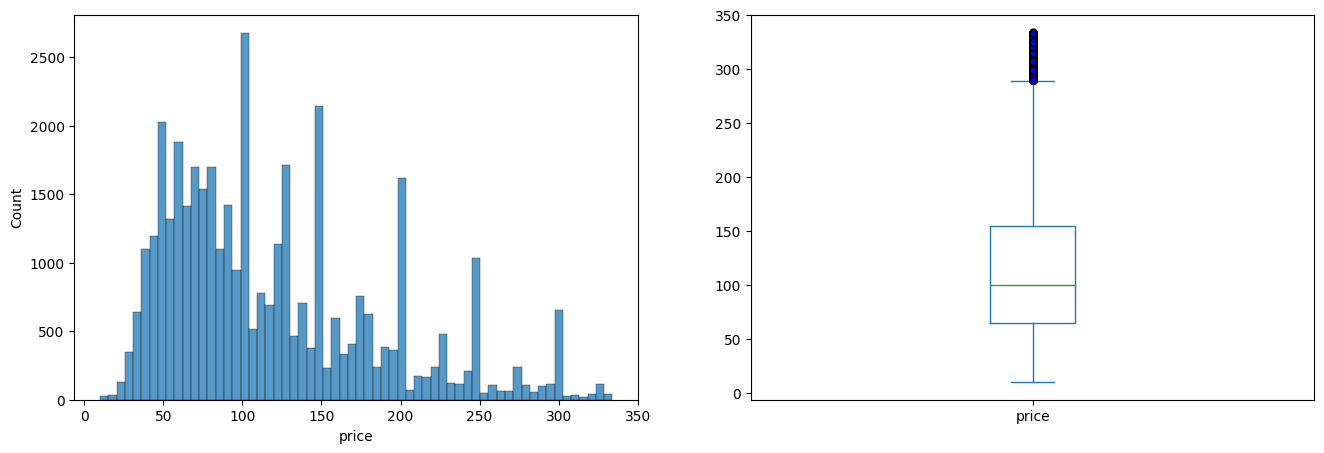

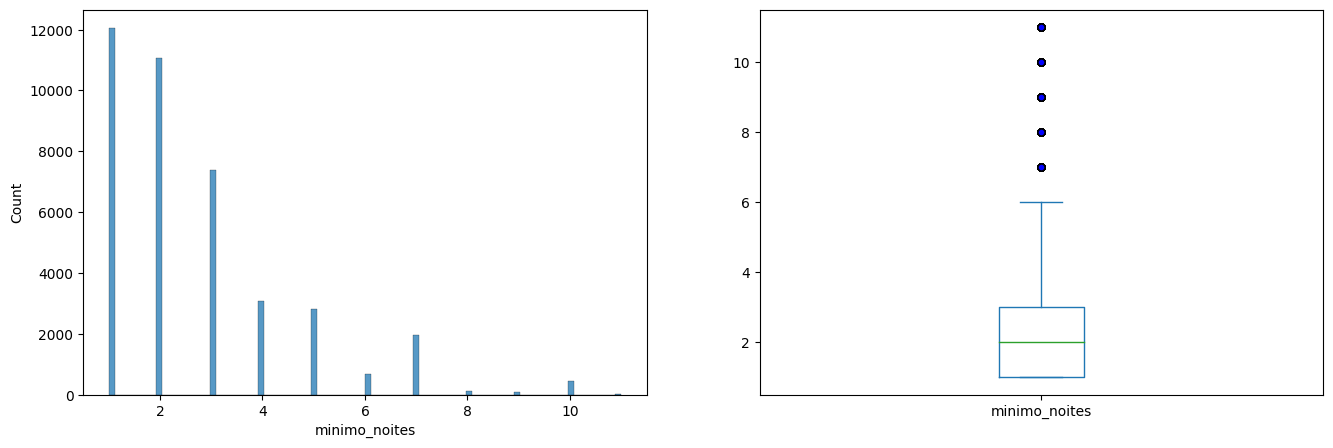

In [40]:
# Gerando o gráfico de distribuição boxplot para checar a distribuição de 'price'

# Configurações para os outliers
flierprops = dict(marker='o', markerfacecolor='blue', markersize=5,
                  linestyle='none', markeredgecolor='black')

plt.subplot(121)
sns.histplot(df_clean['price']);

plt.subplot(122)
df_clean['price'].plot.box(figsize=(16,5), flierprops=flierprops)
plt.show()

# Gerando o gráfico de distribuição boxplot para checar a distribuição de 'minimo_noites'
plt.subplot(121)
sns.histplot(df_clean['minimo_noites']);

plt.subplot(122)
df_clean['minimo_noites'].plot.box(figsize=(16,5), flierprops=flierprops)
plt.show()

Para garantir que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas e as estatísticas novamente para o dataframe limpo.

In [41]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,3.972200e+04,3.972200e+04,39722.000000,39722.000000,39722.000000,39722.000000,39722.000000,39722.000000,39722.000000,39722.000000
mean,1.883771e+07,6.622844e+07,40.727569,-73.949144,119.025024,2.696264,26.386864,1.232591,3.073637,97.172902
std,1.084287e+07,7.751364e+07,0.056291,0.047713,67.158151,1.863541,47.481743,1.683659,19.747797,124.352255
min,2.595000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.417340e+06,7.823258e+06,40.688070,-73.981037,65.000000,1.000000,1.000000,0.070000,1.000000,0.000000
50%,1.947591e+07,3.073296e+07,40.720080,-73.953320,100.000000,2.000000,7.000000,0.510000,1.000000,25.000000
75%,2.861596e+07,1.036670e+08,40.763260,-73.932175,154.750000,3.000000,29.000000,1.890000,2.000000,179.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,11.000000,629.000000,58.500000,327.000000,365.000000


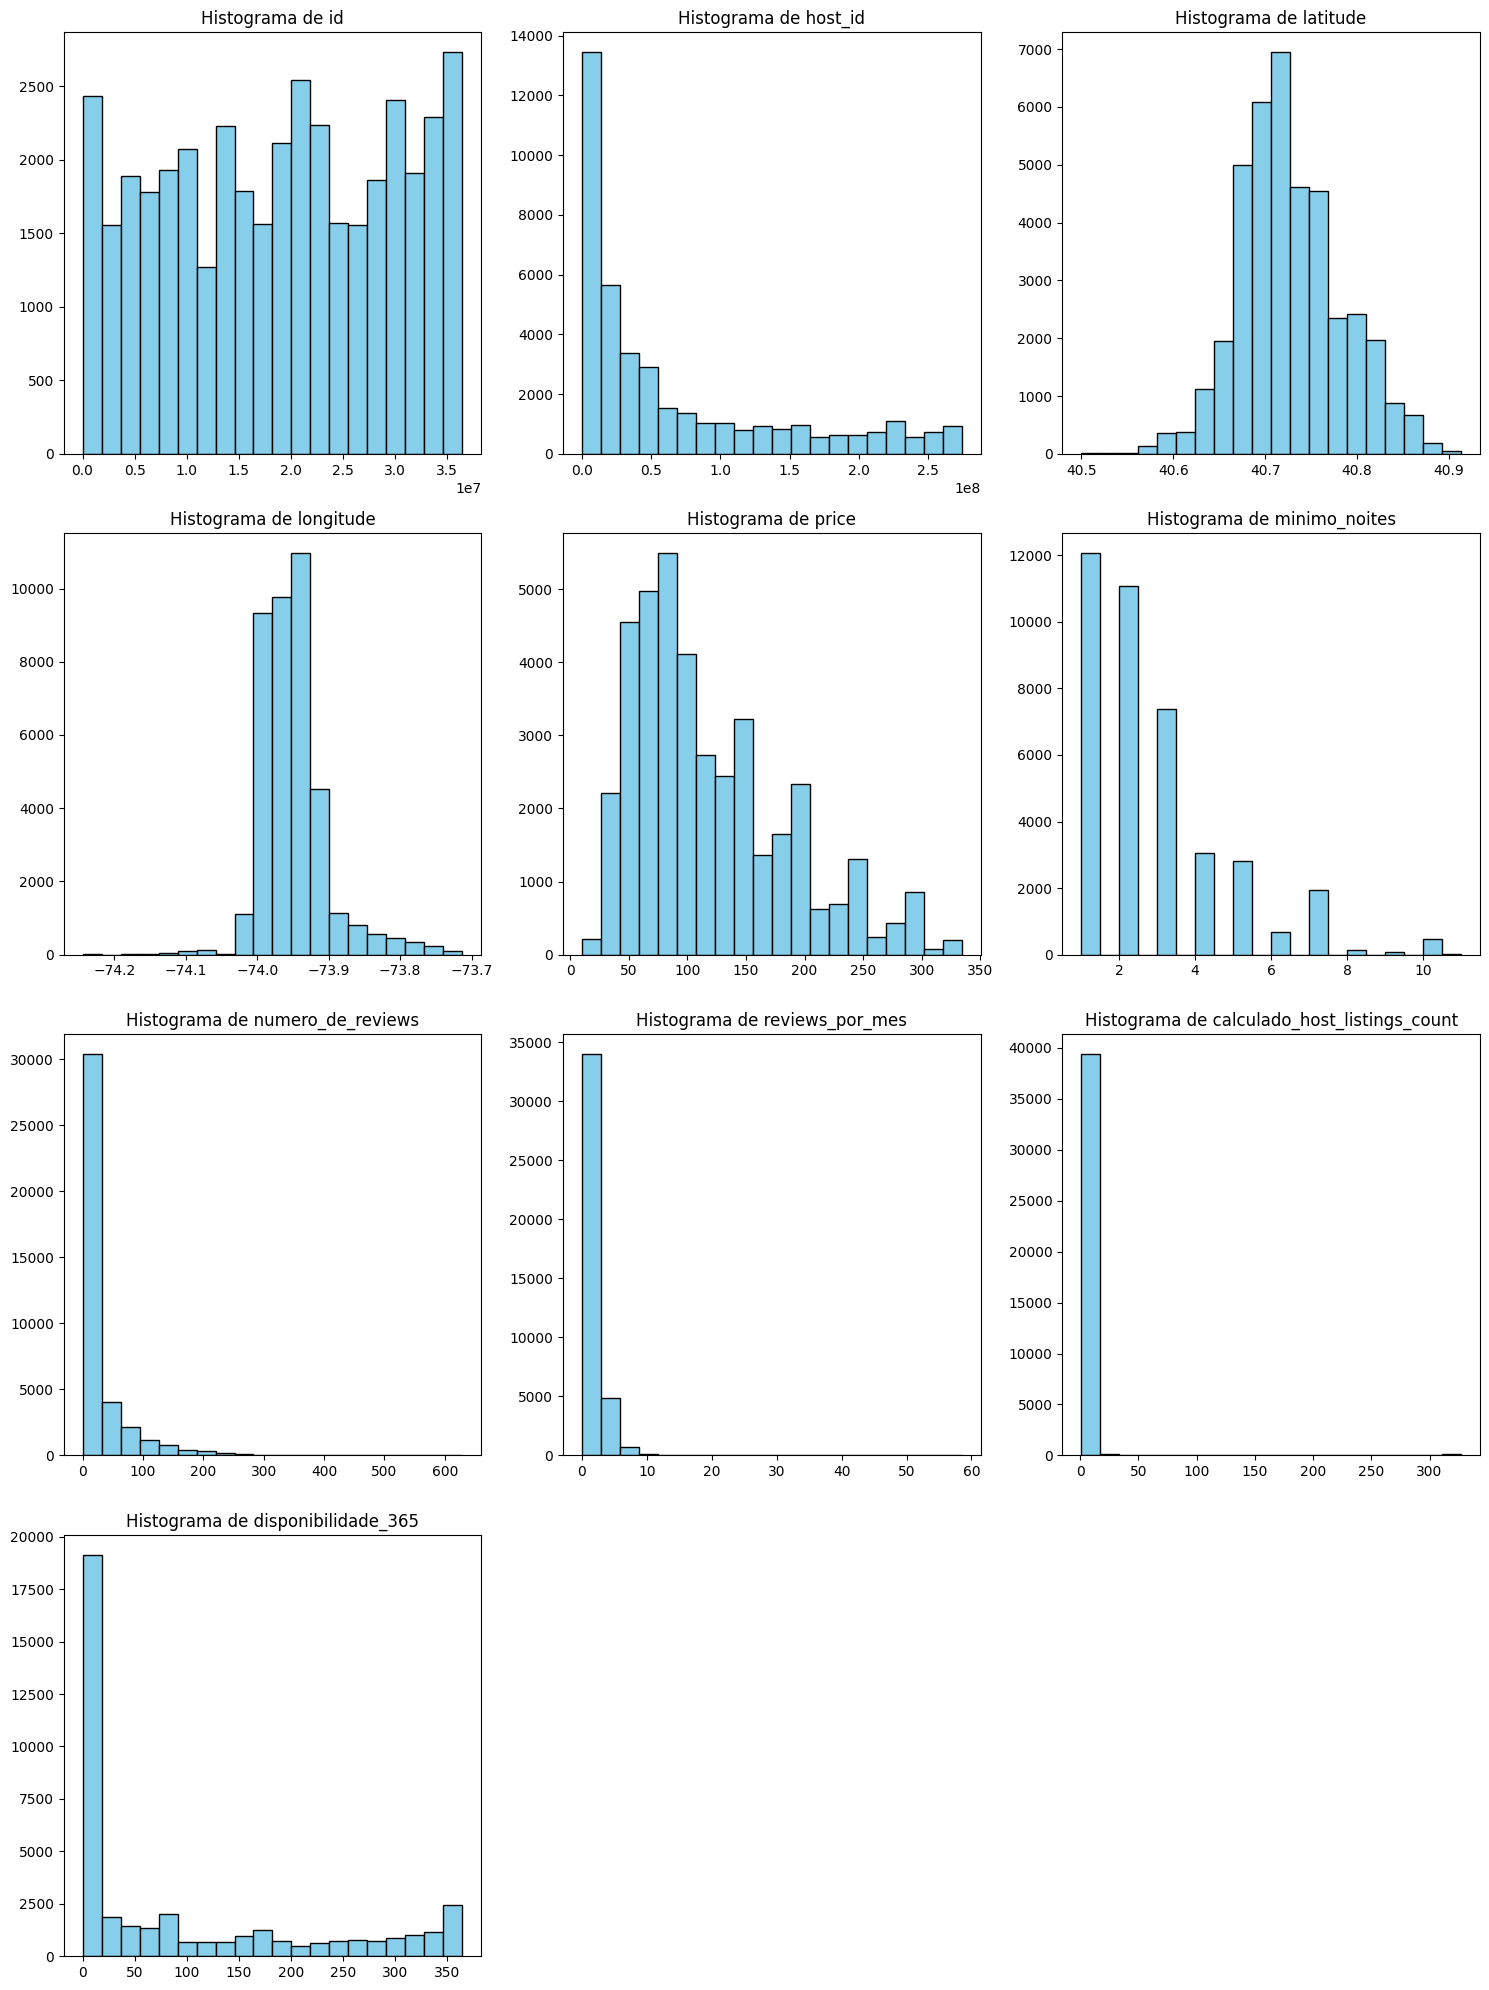

In [42]:
# Gerando novamente os histogramas
numerical = df_clean.select_dtypes(include=['float64', 'int64']).columns
numerical_vars = len(numerical)
num_lines = int(np.ceil(numerical_vars / 3))
num_cols = min(numerical_vars, 3)

fig, axs = plt.subplots(num_lines, num_cols, figsize=(5 * num_cols, 5 * num_lines))
if num_lines * num_cols > 1:
    axs = axs.ravel()
else:
    axs = [axs]

for i, col in enumerate(numerical):
    axs[i].hist(df_clean[col], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histograma de {col}')

for j in range(i + 1, num_lines * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

A partir desses dados, podemos inferir algumas informações importantes para nossa análise:
- A mediana da variável price foi pouco afetada pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes;
- A média da variável price foi reduzida drasticamente, enfatizando a sensibilidade desse atributo em relação aos outliers.

### 1.4 Análise de Rentabilidade dos Bairros

In [43]:
# Realculando a média de preços de cada bairro
avg_prices_neighborhood = df_clean.groupby('bairro_group')['price'].mean().astype(int).sort_values(ascending=False)
print(avg_prices_neighborhood)

bairro_group
Manhattan        143
Brooklyn         107
Queens            91
Staten Island     89
Bronx             78
Name: price, dtype: int64


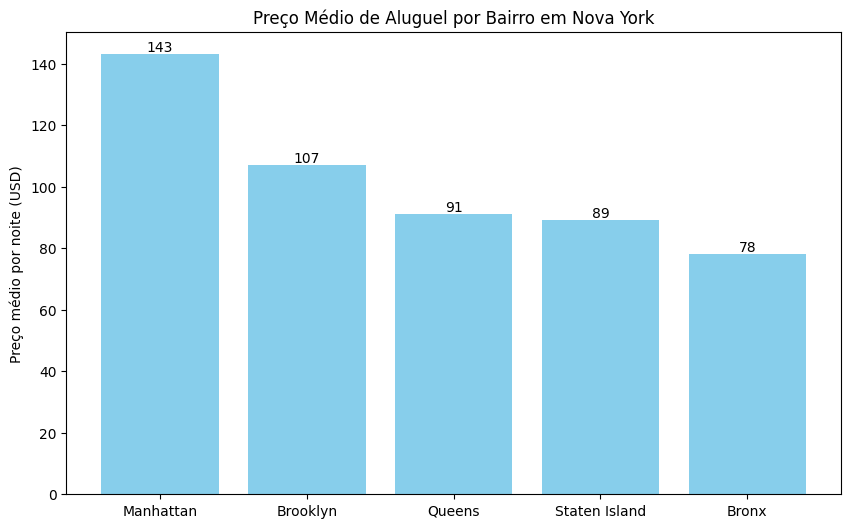

In [45]:
# Plotando o gráfico da média de preços por bairro

# Configurar o estilo e tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras
bars = plt.bar(avg_prices_neighborhood.index, avg_prices_neighborhood.values, color='skyblue')

# Adicionar os valores em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Adicionar títulos e rótulos
plt.title('Preço Médio de Aluguel por Bairro em Nova York')
plt.ylabel('Preço médio por noite (USD)')

# Mostrar o gráfico
plt.show()

Com base nos dados acima, podemos notar que o bairro Manhattan apresenta os maiores preços médios para aluguéis de temporada na região de Nova York, em contrapartida a média de preço por noite no Bronx foi a menor.

Para termos uma visão melhor de qual região seria mais rentável, vamos fazer uma estimativa de faturamento mínimo com base nas quantidades de reviews e no número mínimo de dias para reserva.

Vale ressaltar que essa métrica de faturamento mínimo é uma estimativa e assume que cada review corresponde a uma reserva única que atende ao número mínimo de noites. Na prática, pode haver variações, como reservas que excedem o número mínimo de noites ou reservas que não geraram reviews.

In [46]:
# Calcular o faturamento mínimo de cada anúncio
df_clean['faturamento_minimo'] = df_clean['numero_de_reviews'] * df_clean['minimo_noites'] * df_clean['price']

In [48]:
# Calcular a média de faturamento mínimo de cada bairro
avg_neighborhood_revenue = df_clean.groupby('bairro_group')['faturamento_minimo'].mean().astype(int).sort_values(ascending=False)
print(avg_neighborhood_revenue)

bairro_group
Manhattan        8341
Brooklyn         7194
Staten Island    5931
Queens           4922
Bronx            4314
Name: faturamento_minimo, dtype: int64


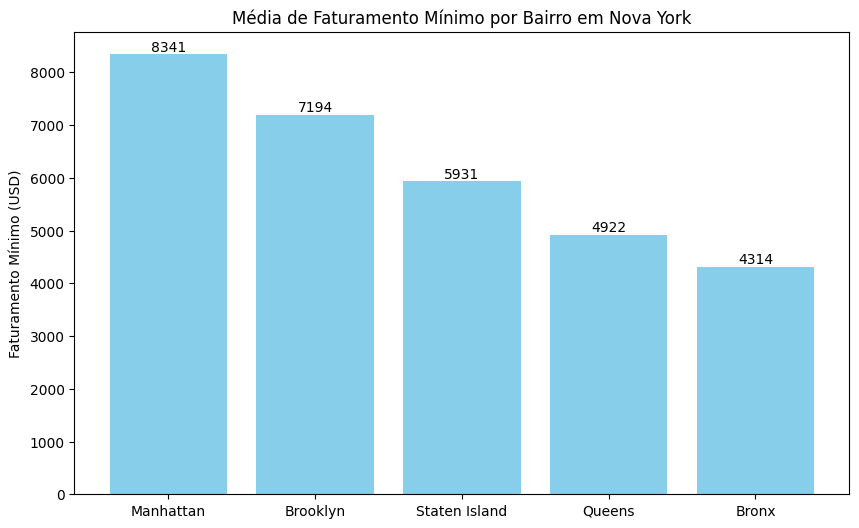

In [50]:
# Plotando o gráfico da média de faturamento mínimo por bairro

# Configurar o estilo e tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras
revenue_bars = plt.bar(avg_neighborhood_revenue.index, avg_neighborhood_revenue.values, color='skyblue')

# Adicionar os valores em cada barra
for bar in revenue_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Adicionar títulos e rótulos
plt.title('Média de Faturamento Mínimo por Bairro em Nova York')
plt.ylabel('Faturamento Mínimo (USD)')

# Mostrar o gráfico
plt.show()

In [51]:
# Agrupar por bairro e contar o número de anúncios em cada um
num_neighborhood_listings = df_clean.groupby('bairro_group')['id'].count().sort_values(ascending=False)
print(num_neighborhood_listings)

bairro_group
Brooklyn         17341
Manhattan        16001
Queens            5027
Bronx             1009
Staten Island      344
Name: id, dtype: int64


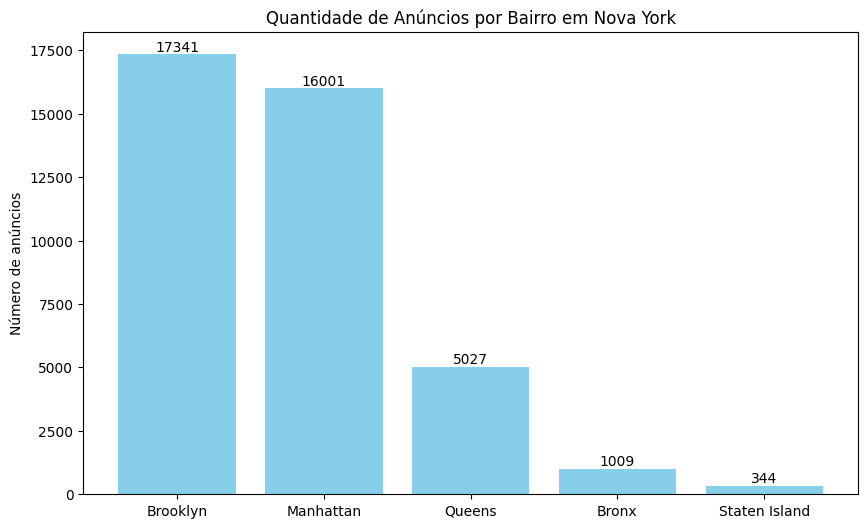

In [52]:
# Plotando o gráfico do número de anúncios por bairro

# Configurar o estilo e tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras
neighborhood_listings_bars = plt.bar(num_neighborhood_listings.index, num_neighborhood_listings.values, color='skyblue')

# Adicionar os valores em cada barra
for bar in neighborhood_listings_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Adicionar títulos e rótulos
plt.title('Quantidade de Anúncios por Bairro em Nova York')
plt.ylabel('Número de anúncios')

# Mostrar o gráfico
plt.show()

Com essa estimativa, podemos validar que Manhattan é de fato a região com maior rentabilidade, apresentando um faturamento mínimo de aproximadamente US$8.341. Portanto, Manhattan seria o bairro mais indicado para investir na compra de imóveis com o intuito de alugar na plataforma, apesar de ocupar o segundo lugar como região com maior número de imóveis sendo alugados, o que é compensado pela diária por noite dos aluguéis nessa região.

Agora vamos verificar qual área dentro de Manhattan seria mais indicada para a compra de um imóvel.

In [53]:
# Filtrar os anúncios em Manhattan
manhattan_listings = df_clean[df_clean['bairro_group'] == 'Manhattan']

In [56]:
# Agrupar por área e somar o faturamento mínimo
area_revenue = manhattan_listings.groupby('bairro')['faturamento_minimo'].sum().sort_values(ascending=False)
print(area_revenue)

bairro
Harlem                 18712672
Hell's Kitchen         14649018
East Village           14468812
Upper West Side        10321030
Upper East Side         9778174
East Harlem             9129360
Lower East Side         7941317
Chelsea                 7642106
Midtown                 6829745
West Village            6115314
Washington Heights      2968711
Chinatown               2929556
Gramercy                2579748
Greenwich Village       2462185
SoHo                    2433319
Financial District      2412120
Nolita                  2207813
Kips Bay                1899336
Murray Hill             1346307
Theater District        1180568
Morningside Heights     1179084
Inwood                   963358
Little Italy             761459
Two Bridges              687367
Tribeca                  477149
Flatiron District        398240
Civic Center             291954
NoHo                     242200
Roosevelt Island         239738
Battery Park City        118594
Stuyvesant Town           77708
M

In [55]:
# Contar o número de anúncios em cada área de Manhattan
area_listings = manhattan_listings.groupby('bairro')['id'].count().sort_values(ascending=False)
print(area_listings)

bairro
Harlem                 2297
East Village           1522
Hell's Kitchen         1426
Upper West Side        1383
Upper East Side        1280
East Harlem             979
Midtown                 811
Washington Heights      808
Chelsea                 766
Lower East Side         746
West Village            555
Financial District      438
Chinatown               306
Morningside Heights     298
Kips Bay                297
Greenwich Village       293
Gramercy                256
SoHo                    243
Murray Hill             226
Inwood                  225
Nolita                  196
Theater District        150
Little Italy             77
Tribeca                  70
Roosevelt Island         69
Two Bridges              69
NoHo                     50
Flatiron District        45
Battery Park City        44
Civic Center             38
Stuyvesant Town          26
Marble Hill              12
Name: id, dtype: int64


Assim, as cinco regiões de Manhattan mais promissoras em termos de rentabilidade para aluguel na plataforma seriam Harlem, East Village, Hell's Kitchen, Upper West Side e Upper East Side, sendo que todas essas áreas juntas somam um faturamento mínimo de US$67.929.706.

> **Nota:** Lembrando que essa é apenas uma estimativa e devemos ter em mente que a rentabilidade real dos imóveis pode apresentar variações, uma vez que estamos trabalhando com valores mínimos de dias para reserva.

### 1.5 Análise dos Tipos de Espaço

In [58]:
room_type_num = df_clean.groupby('room_type')['id'].count().sort_values(ascending=False)
print(room_type_num)

room_type
Private room       19857
Entire home/apt    18876
Shared room          989
Name: id, dtype: int64


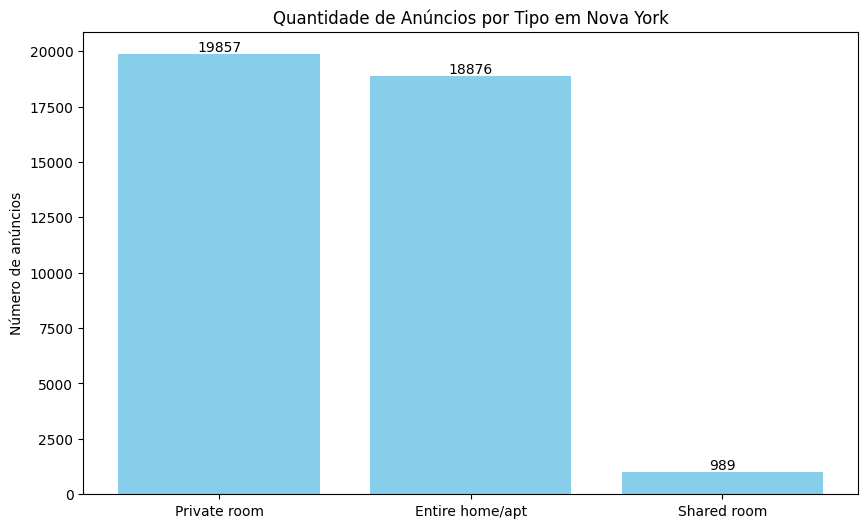

In [61]:
# Plotando o gráfico do número de anúncios por tipo de espaço
plt.figure(figsize=(10, 6))
room_type_bars = plt.bar(room_type_num.index, room_type_num.values, color='skyblue')

for bar in room_type_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title('Quantidade de Anúncios por Tipo em Nova York')
plt.ylabel('Número de anúncios')
plt.show()

Por meio desse gráfico, pode-se perceber a grande predominância de anúncios do tipo espaço inteiro/apartamento e quartos privados, que juntos representam 97,5% de todo o conjunto de dados. Em contrapartida, os anúncios do tipo quarto compartilhado são a minoria com apenas 2,5%. Isso mostra um padrão mais elevado de espaços para locação na cidade de Nova York, uma vez que quartos compartilhados representam aluguéis mais acessíveis e de baixo custo.

In [66]:
# Consultar o faturamento por tipo de espaço
room_type_revenue = df_clean.groupby('room_type')['faturamento_minimo'].mean().sort_values(ascending=False)
print(room_type_revenue)

room_type
Entire home/apt    10781.887052
Private room        4237.714912
Shared room         1727.469161
Name: faturamento_minimo, dtype: float64


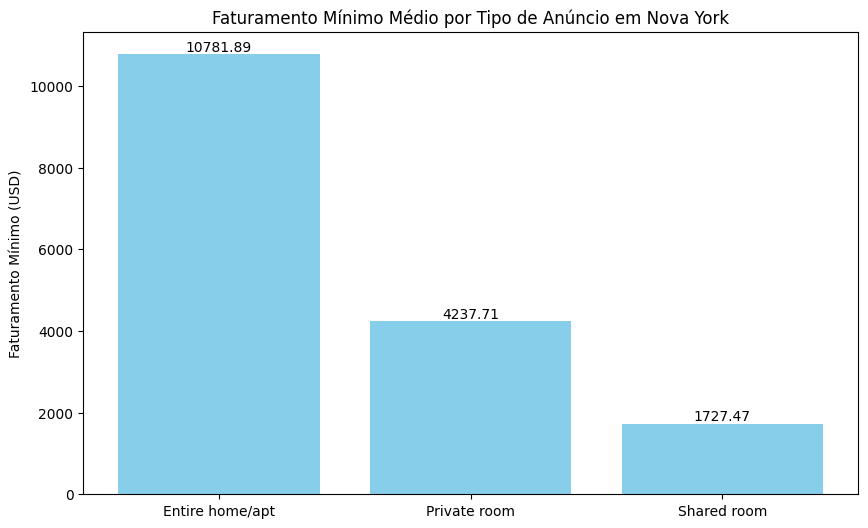

In [67]:
# Plotando o gráfico do faturamento mínimo por tipo de espaço
plt.figure(figsize=(10, 6))
room_type_revenue_bars = plt.bar(room_type_revenue.index, room_type_revenue.values, color='skyblue')

for bar in room_type_revenue_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title('Faturamento Mínimo Médio por Tipo de Anúncio em Nova York')
plt.ylabel('Faturamento Mínimo (USD)')
plt.show()

Aqui é possível perceber que a maior média de faturamento mínimo dos anúncios é proveniente dos espaços do tipo inteiro/apartamento (US$10.781,89), o que faz total sentido levando em consideração que esses imóveis geralmente apresentam um preço de aluguel por noite bem mais elevado do que comparado a espaços do tipo quarto, seja privado ou compartilhado.

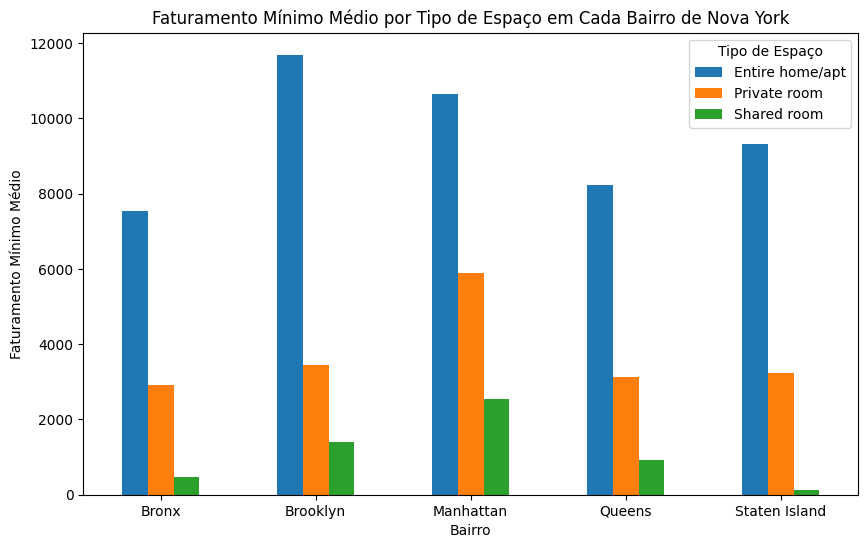

In [68]:
# Faturamento mínimo médio por tipo e por bairro

# Agrupar os dados
grouped_data = df_clean.groupby(['bairro_group', 'room_type']).agg({'faturamento_minimo':'mean'}).reset_index()

# Pivotear os dados para o formato correto para plotagem
pivot_data = grouped_data.pivot(index='bairro_group', columns='room_type', values='faturamento_minimo')

# Plotar o gráfico de barras agrupadas
pivot_data.plot(kind='bar', figsize=(10, 6))

# Adicionando detalhes ao gráfico
plt.title('Faturamento Mínimo Médio por Tipo de Espaço em Cada Bairro de Nova York')
plt.xlabel('Bairro')
plt.ylabel('Faturamento Mínimo Médio')
plt.xticks(rotation=360)
plt.legend(title='Tipo de Espaço')
plt.show()


In [ ]:
print(pivot_data.astype(int).sort_values(ascending=False, by='Entire home/apt'))

room_type      Entire home/apt  Private room  Shared room
bairro_group                                             
Brooklyn                 11691          3441         1392
Manhattan                10643          5881         2542
Staten Island             9329          3227          118
Queens                    8222          3118          915
Bronx                     7533          2918          463


Comparando os dados de faturamento mínimo médio para cada tipo de espaço e para cada grande bairro de Nova York, em todos os bairros é notável a discrepância no rendimento de imóveis alugados por completo em contrapartida ao faturamento proveniente do aluguel de quartos privados ou compartilhados.

Dessa forma, a melhor opção de investimento para alguém que deseja anunciar um imóvel na plataforma seria investir em espaços inteiros e apartamentos do tipo studio/loft, pois esses imóveis valorizam muito o preço do aluguel e garantem maior rentabilidade a longo prazo.

### 1.6 Análise de Padrão no Nome do Anúncio

Para verificar se existe algum padrão no texto dos nomes dos anúncios para lugares de mais alto valor, seguiremos uma abordagem de análise de texto básica. Para isso, vamos analisar a frequência das palavras nos nomes dos anúncios com os preços mais altos.

Algumas considerações serão adotadas para que seja possível prosseguir com a análise:
- Anúncios serão considerados de "alto valor" caso o preço por noite seja igual ou superior ao 85º percentil do dataset;
- Os textos de cada anúncio que se enquadram nessa categoria serão normalizados por meio da conversão para minúsculo, da remoção de pontuação e da remoção de palavras comuns;
- Será analisada a frequência de cada palavra e a sua relevância no padrão de texto dessa categoria de anúncios.

In [81]:
# Importando as bibliotecas necessárias para essa análise
from collections import Counter
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [82]:
# Definindo o critério para 'alto valor'
higher_price_percentil = df_clean['price'].quantile(0.85)
df_higher_price = df_clean[df_clean['price'] > higher_price_percentil]
df_higher_price.shape

(5698, 17)

In [83]:
df_higher_price.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,faturamento_minimo
count,5.698000e+03,5.698000e+03,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000
mean,1.933192e+07,6.958512e+07,40.731839,-73.970029,245.194805,2.845209,20.015971,1.055379,9.193577,109.302738,12807.039488
std,1.160165e+07,8.513143e+07,0.042497,0.037813,37.403919,1.754328,37.413322,1.431533,49.365611,128.198192,25920.365256
min,2.595000e+03,2.845000e+03,40.508680,-74.239860,200.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.829840e+06,6.255057e+06,40.709183,-73.992975,210.000000,2.000000,1.000000,0.040000,1.000000,0.000000,440.000000
50%,2.018466e+07,2.524922e+07,40.729375,-73.979340,248.000000,2.000000,5.000000,0.420000,1.000000,42.500000,2989.000000
75%,3.031555e+07,1.145483e+08,40.759640,-73.953720,275.000000,4.000000,20.000000,1.560000,1.000000,216.000000,12387.500000
max,3.648301e+07,2.743115e+08,40.902600,-73.716900,334.000000,11.000000,404.000000,12.000000,327.000000,365.000000,488410.000000


Nota-se que 5.698 dos anúncios podem ser considerados de alto valor, com base nos requisitos definidos anteriormente, com o preço por noite variando de 200 a 334 dólares. Isso representa **14,3%** do dataset atual, um quantitativo representativo para a análise que estamos conduzindo.

In [84]:
# Extraindo nomes dos anúncios
listings_name = df_higher_price['nome']

In [85]:
# Processamento de texto
text = ' '.join(listings_name).lower()
text = re.sub(r'[^a-zA-Z\s]', '', text)
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text)
filtered_tokens = [w for w in tokens if not w in stop_words]

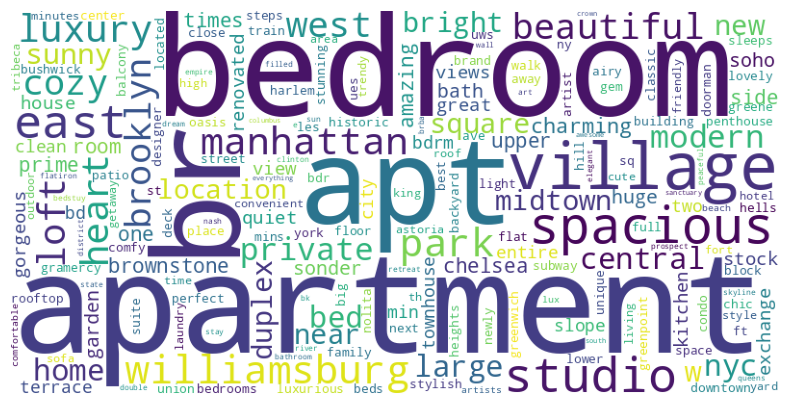

In [86]:
# Análise de frequência
frequent_words = Counter(filtered_tokens)

# Visualização com WordCloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(frequent_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

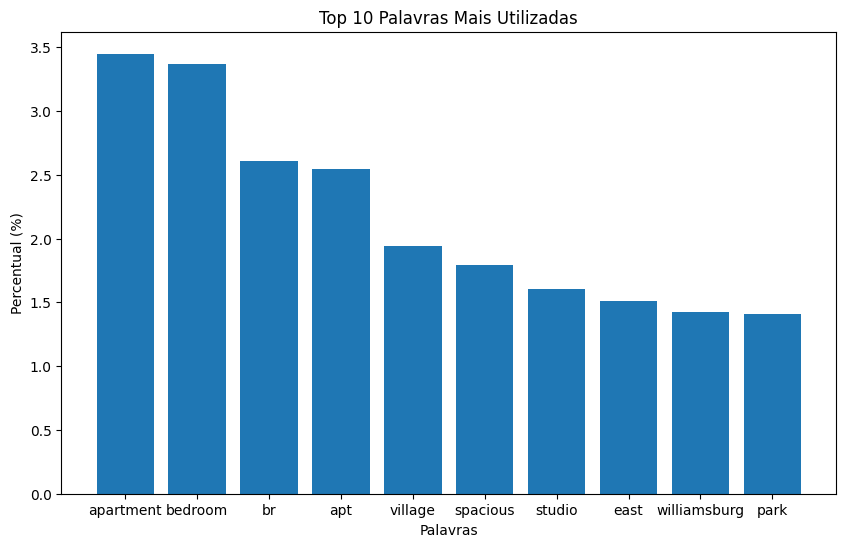

In [87]:
# Calculando percentuais
total_words = sum(frequent_words.values())
percents = {word: (contagem / total_words) * 100 for word, contagem in frequent_words.items()}

# Selecionando as top N palavras para visualização
top_n = 10
top_words = dict(sorted(percents.items(), key=lambda item: item[1], reverse=True)[:top_n])

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Palavras')
plt.ylabel('Percentual (%)')
plt.title('Top {} Palavras Mais Utilizadas'.format(top_n))
plt.show()

A partir desses resultados, podemos observar que as 10 palavras com maior frequência foram "apartment", "bedroom", "br", "apt", "village", "spacius", "studio", "east", "williamsburg" e "park", nessa ordem de maior ocorrência.

Logo, percebe-se que as locações mais caras são pedrominantemente referentes a apartamentos e quartos espaçosos com ênfase nos modelos studio/loft, inseridos na região leste e no bairro Williamsburg de Nova York, bem como próximas a parques, como o tão renomado Central Park que é uma referência turística na cidade.

Já o termo "Village" pode fazer referência ao bairro Greenwich Village, também conhecido como "The Village", um bairro muito procurado tanto por turistas quanto por moradores, devido a suas diversas opções de entretenimento, restaurantes, cafés e lojas. Além desse, há também o East Village e o West Village, que são áreas adjacentes com suas próprias identidades e atrativos únicos. A alta frequência desse termo na análise mostra o quanto essas regiões são valorizadas e podem representar um bom investimento de locação.

Uma importante observação é também a predominância da frequência de palavras como "cozy", "luxury", "sunny", "oasis", "charming", "private", "perfect", que refletem o estilo de vida nova-iorquino que é o que muitas pessoas tanto buscam quando vão até a cidade.

Dessa forma, uma boa estratégia para nomeação do anúncio na plataforma é informar o tipo de espaço com ênfase nas qualidades deslumbrantes que o imóvel tem a oferecer. Dessa forma, pode-se aumentar a valorização do anúncio e até mesmo categorizá-lo como um imóvel de alto valor.

Para validar se o dataset continua se comportando dessa forma com o conjunto de dados original, vamos comparar as Top 10 palavras mais utilizadas seguindo o mesmo raciocínio anterior, porém utilizando o dataset original.

In [88]:
# Comparando com o dataset original
percent_higher_price_org = df['price'].quantile(0.85)
df_higher_price_org = df[df['price'] > percent_higher_price_org]
df_higher_price_org.shape

(7090, 16)

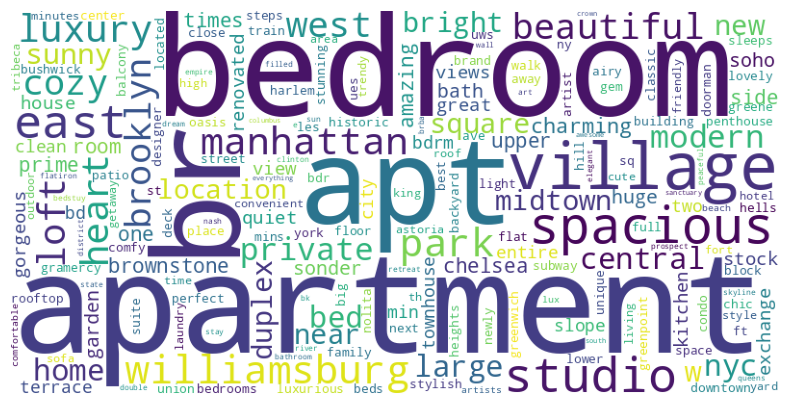

In [89]:
# Processamento de texto
org_listings_name = df_higher_price_org['nome']
org_text = ' '.join(org_listings_name).lower()
org_text = re.sub(r'[^a-zA-Z\s]', '', org_text)
org_stop_words = set(stopwords.words('english'))
org_tokens = word_tokenize(org_text)
org_filtered_tokens = [w for w in tokens if not w in stop_words]
org_frequent_words = Counter(org_filtered_tokens)
org_wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(org_frequent_words)

# Gerando o gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

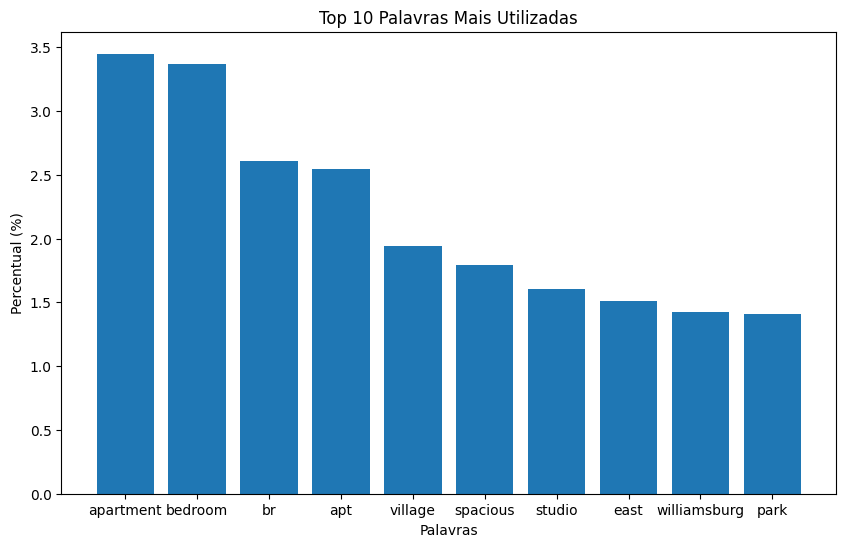

In [90]:
# Análise de percentuais
org_total_words = sum(org_frequent_words.values())
org_percents = {word: (count / org_total_words) * 100 for word, count in org_frequent_words.items()}

org_top_words = dict(sorted(org_percents.items(), key=lambda item: item[1], reverse=True)[:top_n])

plt.figure(figsize=(10, 6))
plt.bar(org_top_words.keys(), org_top_words.values())
plt.xlabel('Palavras')
plt.ylabel('Percentual (%)')
plt.title('Top {} Palavras Mais Utilizadas'.format(top_n))
plt.show()

Comparando os resultados, observa-se que o padrão de palavras mais utilizadas no nome dos anúncios não é alterado. Portanto, temos uma representação válida das palavras que são mais utilizadas em locações de alto valor na plataforma.

> **Nota:** é importante reforçar que a análise de texto simples baseada em frequência de palavras pode não capturar nuances contextuais. Portanto, para uma análise mais profunda, técnicas mais avançadas podem ser necessárias.

### 1.7 Análise de Correlação

Nesta etapa, faremos a análise de correlação entre as variáveis para validar o seu grau de influência sobre a variável target 'price'. Os valores de correlação são capazes de indicar a força e a direção da relação linear entre a variável 'price' e outras variáveis do dataset. Para tanto, será utilizado o método de Pearson, projetado para lidar com relações lineares.

Para prosseguir com a análise,  será necessário primeiramente converter as variáveis categóricas relevantes para a análise em variáveis numéricas. Nesse caso, faremos a conversão das variáveis *'bairro_group'* e *'room_type'*, que possuem 5 e 3 categorias distintas, respectivamente.

In [91]:
# Convertendo variáveis categóricas em numéricas
df_corr = df_clean.copy()
df_corr = pd.get_dummies(df_corr, columns=['bairro_group'])
df_corr = pd.get_dummies(df_corr, columns=['room_type'])

Agora que as variáveis categóricas foram convertidas para valores numéricos, podemos iniciar a validação de correlação entre as variáveis.

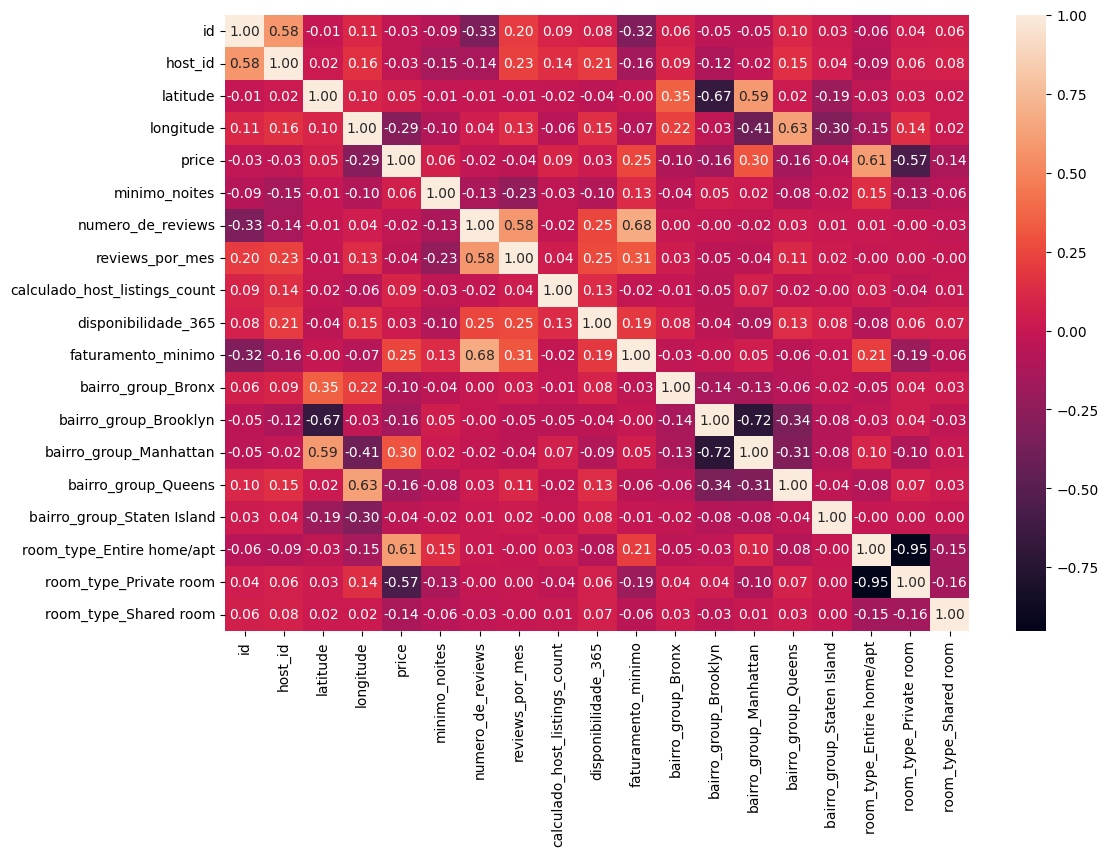

In [92]:
# Criando a matriz de correlação de Pearson (para relações lineares)
pearson_correlation_matrix = df_corr.corr(method='pearson', numeric_only=True)

# Gerando o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f")
plt.show()

Com base na matriz de correlação acima, nota-se que as variáveis que apresentaram uma **correlação positiva com o preço** foram: 'room_type_Entire home/apt' (0,61), 'bairro_group_Manhattan' (0,30), 'faturamento_minimo' (0,25), 'calculado_host_listings_count' (0,09), 'minimo_noites' (0,06), 'latitude' (0,05) e 'disponibilidade_365' (0,03).

Nesse sentido, observa-se que os anúncios do tipo 'Entire home/apt' possuem uma correlação positiva forte com o preço, sugerindo que os apartamentos ou casas inteiras tendem a ser mais caros do que outros tipos de acomodações.

O bairro Manhattan apresentou uma correlação positiva moderada com o preço (0,30), indicando que os anúncios desse bairro tendem a apresentar preços mais elevados em comparação aos demais e é um fator relevante para a precificação do aluguel dos imóveis.

Da mesma forma, a variável 'faturamento_minimo' apresentou uma correlação positiva moderada (0,25) com o preço, o que indica que, em geral, à medida que o faturamento mínimo aumenta, o preço também tende a aumentar. Isso já era de se esperar já que o faturamento foi calculado a partir do preço por noite de cada anúncio.

As demais variáveis apresentaram valores baixos de correlação, indicando uma correlação positiva muito fraca com o preço, ou seja, sem muita capacidade de interferir nos preços dos anúncios. Portanto, pode-se considerar uma relação quase insignificante entre o preço e o número mínimo de noites, a disponibilidade ao longo do ano e a quantidade de anúncios de cada anfitrião.

No que se refere à **correlação negativa com o preço**, as variáveis identificadas foram: 'bairro_group_Staten Island' (-0,04), 'bairro_group_Bronx' (-0,10), 'room_type_Shared room' (-0,14), 'bairro_group_Brooklyn' (-0,16), 'bairro_group_Queens' (-0,16), 'longitude' (-0,29) e 'room_type_Private room' (-0,57).

Isso indica que locações do tipo quartos privados e compartilhados tendem a custar menos em compração aos espaços inteiros/apartamentos. Assim como os bairros Brooklyn, Queens, Bronx e Staten Island tendem a possuir preços menores de aluguel por noite.

Em termos de localização geográfica, a correlação com a latitude é muito fraca e positiva, sugerindo uma relação muito sutil com o preço. A correlação negativa moderada com a longitude indica que, à medida que a longitude aumenta (movendo-se para o oeste), os preços tendem a diminuir.

Por fim, as variáveis referentes a revisões e identificação do anúncio/host mostraram correlações muito fracas, negativas, indicando que não há uma relação significativa entre essas variáveis e o preço.

> **Nota:** É importante frisar que correlação não implica causalidade. Logo, mesmo que duas variáveis estejam fortemente correlacionadas, isso não significa que uma causa mudanças na outra.

Para melhor visualização, a seguir serão plotados os gráficos de dispersão das variáveis que apresentaram maior correlação positiva ou negativa com o preço.

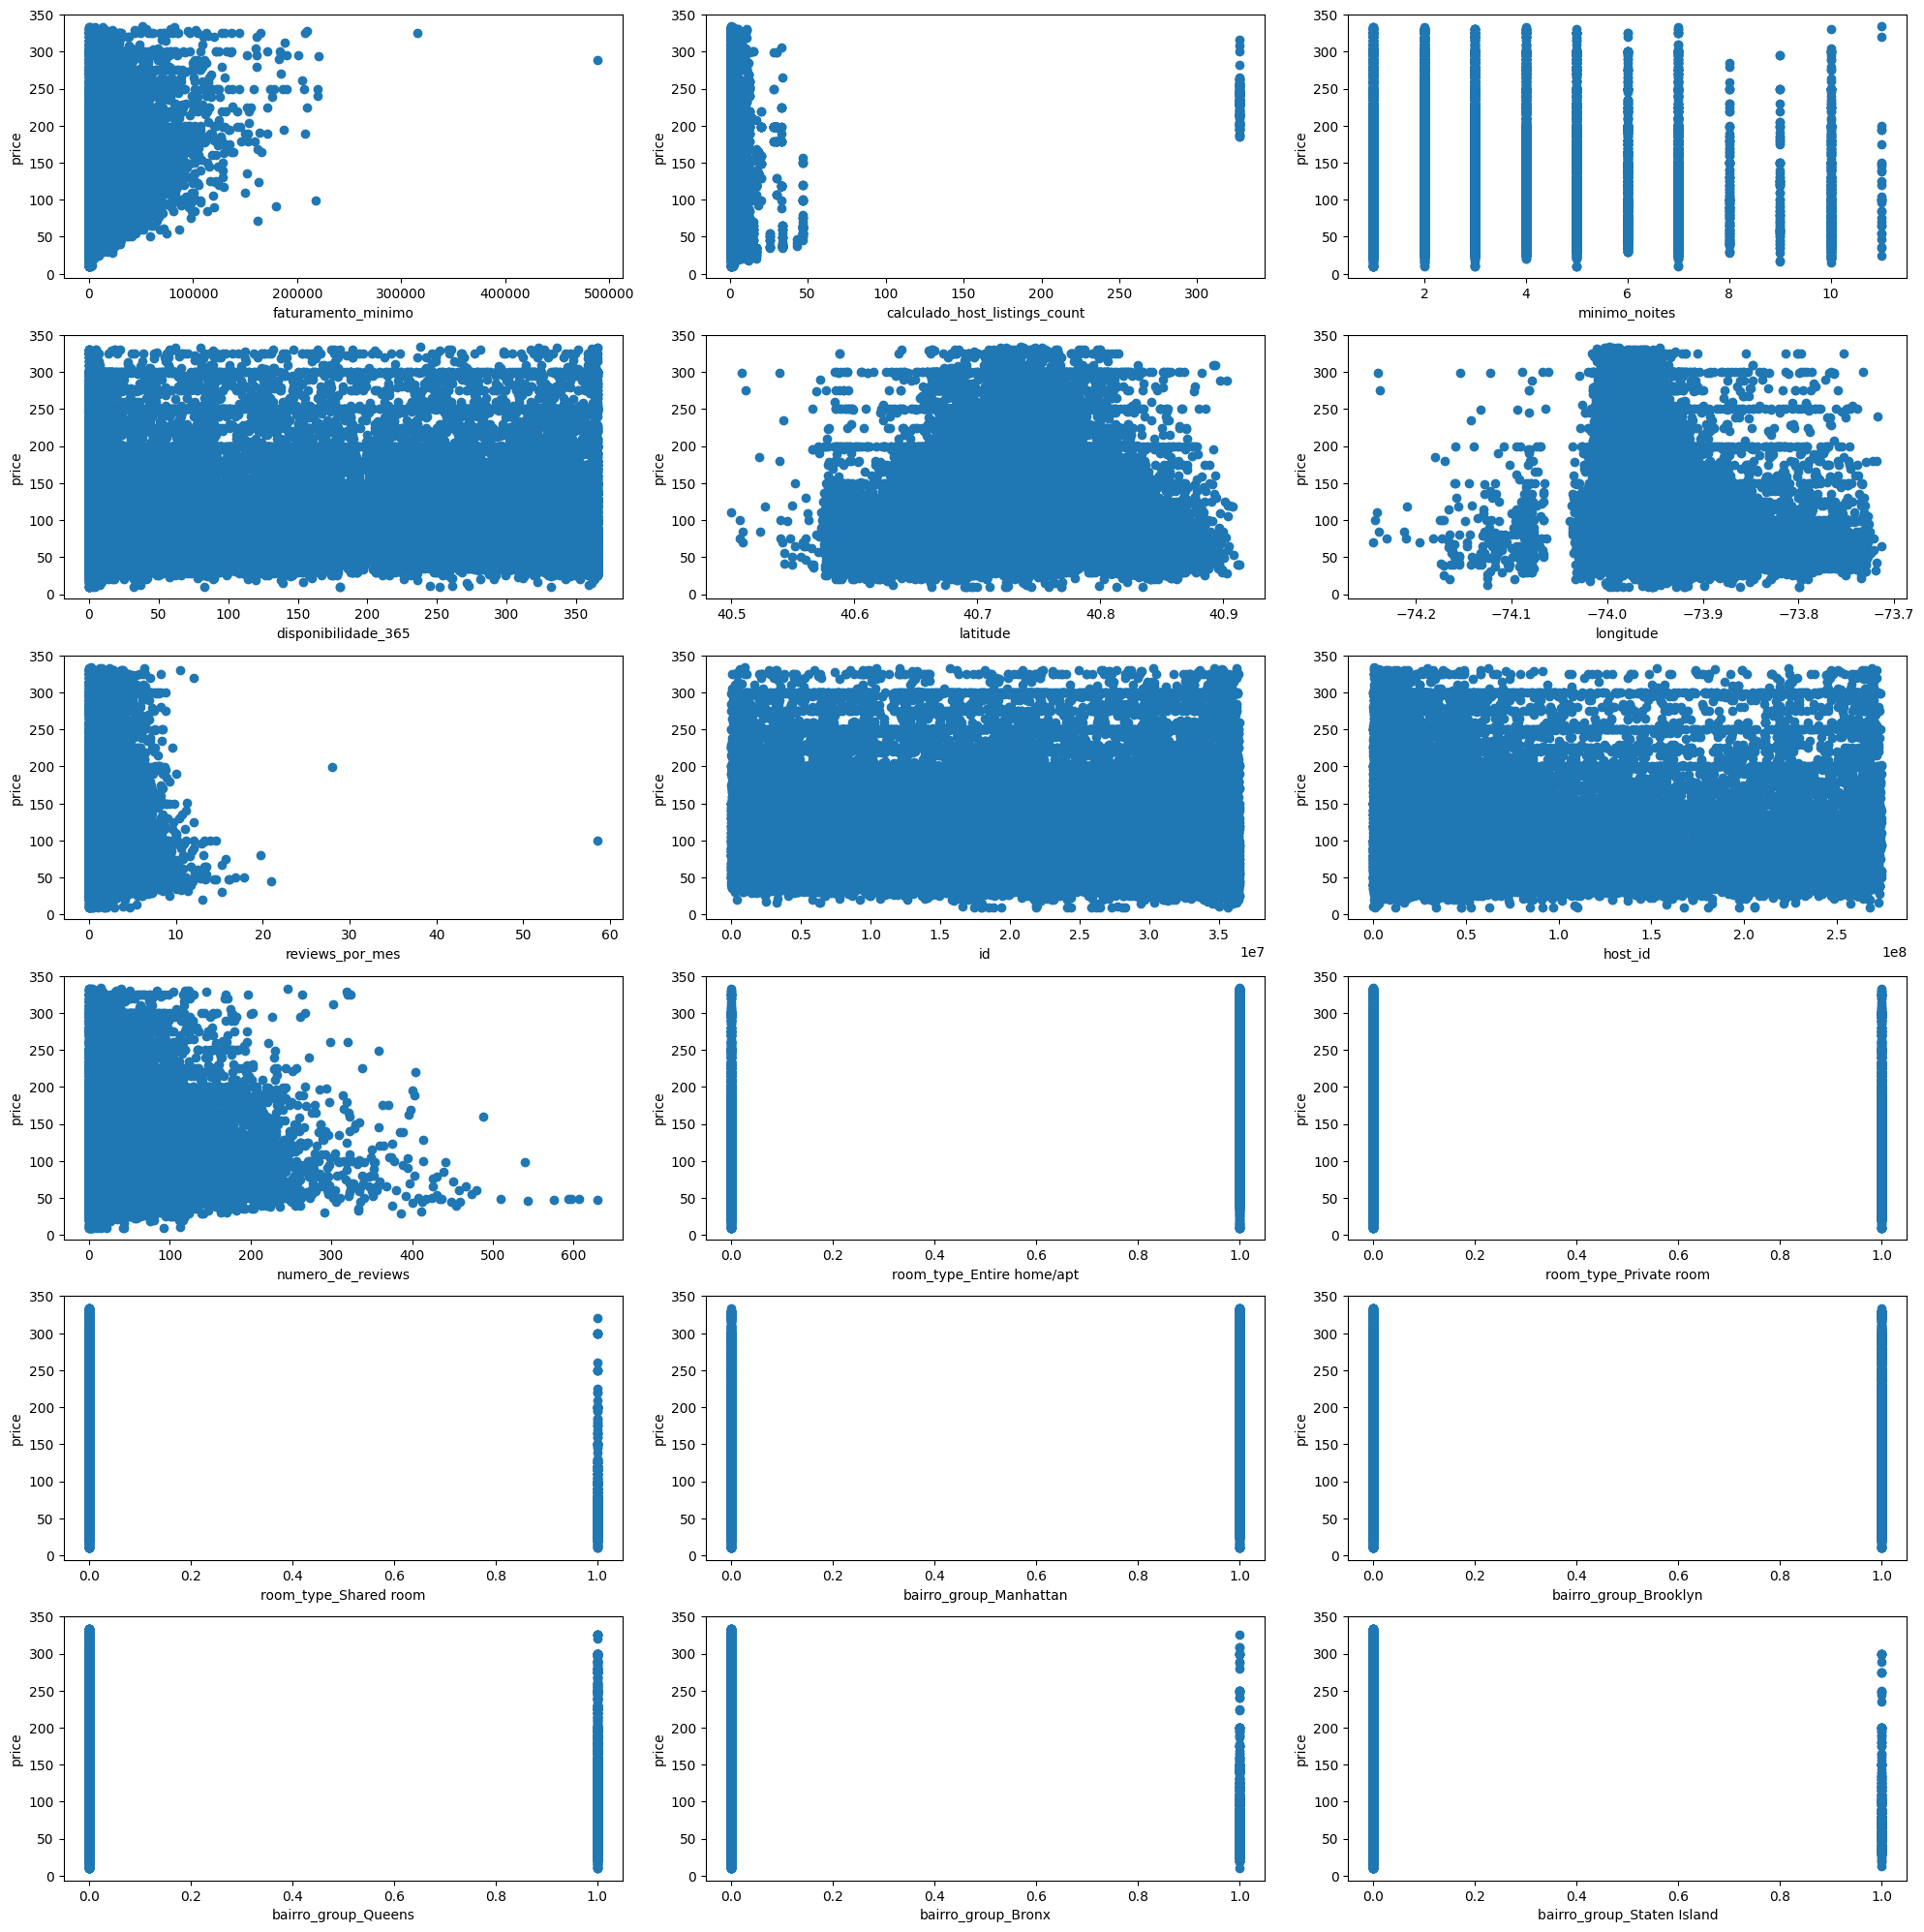

In [94]:
# Lista das variáveis para o gráfico
vars = ['faturamento_minimo', 'calculado_host_listings_count', 'minimo_noites',
       'disponibilidade_365', 'latitude', 'longitude', 'reviews_por_mes',
        'id', 'host_id', 'numero_de_reviews', 'room_type_Entire home/apt',
        'room_type_Private room', 'room_type_Shared room', 'bairro_group_Manhattan',
        'bairro_group_Brooklyn', 'bairro_group_Queens', 'bairro_group_Bronx', 'bairro_group_Staten Island']

# Configura o tamanho da figura
plt.figure(figsize=(20, 20))

# Loop para criar um subplot para cada variável
for i, var in enumerate(vars):
    plt.subplot(6, 3, i+1)
    plt.scatter(df_corr[var], df_corr['price'])
    plt.xlabel(var)
    plt.ylabel('price')

plt.tight_layout()
plt.show()

## Etapa 2: Implementação do Modelo de Precificação

Nessa etapa, será construído um modelo preditivo para estimar a variável target 'price', com base nas variáveis independentes escolhidas para utilização no modelo.

Baseado na análise de correlação, as variáveis 'type_room', 'bairro_group', 'faturamento_minimo', 'latitude', e 'longitude' se mostraram importantes, pois têm correlações significativas com o preço. Portanto, serão incluídas na modelagem.

Embora as variáveis 'minimo_noites, 'numero_de_reviews' e 'disponibilidade_365' apresentaram baixa correlação, elas serão incluídas para verificar se acrescentam valor preditivo ao modelo.

Como o objetivo deste desafio é prever um valor contínuo (o preço do aluguel), estamos lidando com um problema de **Regressão**. Portanto, será utilizado o modelo de **Regressão Linear Simples** para gerar a precificação desejada.

A escolha desse modelo de Regressão Simples foi feita como ponto de partida para entender a relação linear entre as variáveis e o preço. A vantagem em se utilizar o modelo de regressão consiste em sua simplicidade e fácil interpretação, embora ele possa não capturar relações complexas, o que constitui uma desvantagem em conjuntos de dados com relações de alta complexidade.

Ao final da implementação do modelo, será feita uma avaliação de eficácia por meio de métricas de performance. Para este cenário, foi adotada a **Raiz Quadrada do Erro-Médio (RMSE - Root Mean Square Error)** como medida de performance pois permite medir a diferença média quadrada entre os valores previstos e reais. E é mais sutil a grandes erros.

Além dessa, também utilizei o **Coeficiente de Determinação (R²)** e o **Erro Médio Absoluto (MAE - Mean Absolute Error)** para comparar a performance do modelo.

### 2.1 Modelo de Regressão Simples

O primeiro passo para iniciar a modelagem dos dados é separar os dados em **Variável Dependente (Y)** e **Variáveis Independentes (X)**. Para isso precisamos garantir que apenas as variáveis de interesse estão no dataset.

In [95]:
# Removendo variáveis desnecessárias
df_model = df_corr.copy()
df_model= df_model.drop(columns=['id', 'nome', 'host_id', 'host_name', 'bairro',
                                 'calculado_host_listings_count', 'ultima_review',
                                 'reviews_por_mes'])
df_model.head()

,latitude,longitude,price,minimo_noites,numero_de_reviews,disponibilidade_365,faturamento_minimo,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75362,-73.98377,225,1,45,355,10125,0,0,1,0,0,1,0,0
1,40.80902,-73.94190,150,3,0,365,0,0,0,1,0,0,0,1,0
2,40.68514,-73.95976,89,1,270,194,24030,0,1,0,0,0,1,0,0
3,40.79851,-73.94399,80,10,9,0,7200,0,0,1,0,0,1,0,0
4,40.74767,-73.97500,200,3,74,129,44400,0,0,1,0,0,1,0,0


In [96]:
# Definindo os valores de X e Y
X = df_model.drop(columns=['price'])
Y = df_model['price']

Agora que X e Y já foram definidos, vamos separar os subconjuntos de dados para treinamento e teste. Aqui foi adotado um percentual de 75% dos dados para treinamento e 25% para teste.

In [97]:
# Separando os subconjuntos de treinamento e teste de forma aleatória
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [98]:
# Inicializando o modelo de regressão
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [100]:
# Prevendo os valores de Y
y_pred = regressor.predict(X_test)
print(y_pred)

[ 74.03907481 151.84166051 157.62098876 ... 158.95413074  69.95226423
 166.75091514]


In [101]:
# calculando R²
print("Coeficiente de Determinação (R²): {}".format(regressor.score(X_test, y_test)))

Coeficiente de Determinação (R²): 0.5094300524356117


O coeficiente de determinação mostra a qualidade de ajuste do modelo, ou seja, indica que 50,94% da variabilidade em Y (preço por noite) pode ser explicada usando X (as demais variáveis sendo avaliadas no modelo).

Agora vamos verificar o valor de RMSE.

In [102]:
# calculando RMSE
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("RMSE da Regressão Linear: {}".format(lin_rmse))

RMSE da Regressão Linear: 47.71734600030519


O RMSE mede a média das diferenças ao quadrado entre os valores previstos pelo modelo e os valores reais. Dessa forma, quanto maior o RMSE, maior é a dispersão dessas diferenças.
Neste caso, o RMSE de 47,72 significa que, em média, o modelo erra as previsões de preço por uma margem de cerca de 47,72 dólares.

In [103]:
# calculando o Erro Médio Absoluto (MAE)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Erro Médio Absoluto (MAE): {}".format(lin_mae))

Erro Médio Absoluto (MAE): 35.227196184499384


Já o MAE mede a média das diferenças absolutas entre as previsões e os valores reais. Isso fornece uma medida mais direta e fácil de interpretar da média dos erros. No cenário em questão, o MAE de 35,22 significa que, em média, o modelo erra as previsões de preço por cerca de 35,22 dólares. Essa métrica é menos sensível a outliers do que o RMSE, pois não eleva os erros ao quadrado.

A diferença entre o RMSE e o MAE sugere que podem existir alguns outliers significativos nos erros de previsão (já que o RMSE é maior que o MAE). Isso pode indicar que o modelo lida bem com a maioria dos dados, mas tem dificuldades em alguns casos específicos. Por isso seria interessante a execução de mais testes e a inclusão de outras variáveis independentes para melhorar a performance do modelo.

Com o modelo criado, agora é possível fazer previsões de preço dos anúncios para um novo conjunto de dados. Assim, supondo um apartamento com as seguintes características, teríamos a previsão de preço conforme abaixo.

```
{'id': 2595,
'nome': 'Skylit Midtown Castle',
'host_id': 2845,
'host_name': 'Jennifer',
'bairro_group': 'Manhattan',
'bairro': 'Midtown',
'latitude': 40.75362,
'longitude': -73.98377,
'room_type': 'Entire home/apt',
'price': 225,
'minimo_noites': 1,
'numero_de_reviews': 45,
'ultima_review': '2019-05-21',
'reviews_por_mes': 0.38,
'calculado_host_listings_count': 2,
'disponibilidade_365': 355}
```



In [104]:
# Novos dados para previsão
new_data = {'latitude': 40.75362,
            'longitude': -73.98377,
            'minimo_noites': 1,
            'numero_de_reviews': 45,
            'disponibilidade_365': 355,
            'faturamento_minimo': 10125,
            'bairro_group_Bronx': 0,
            'bairro_group_Brooklyn': 0,
            'bairro_group_Manhattan': 1,
            'bairro_group_Queens': 0,
            'bairro_group_Staten Island': 0,
            'room_type_Entire home/apt': 1,
            'room_type_Private room': 0,
            'room_type_Shared room': 0}

# Convertendo o novo dado em um DataFrame
new_data_df = pd.DataFrame([new_data])

# Fazendo a previsão com o modelo
predicted_price = regressor.predict(new_data_df)
print("Preço previsto:", predicted_price[0])

Preço previsto: 200.08056998263055


Conforme o resultado obtido, o preço previsto  pelo modelo de USD 200,08 é bem próximo do valor original utilizado como teste (USD 225), apresentando uma variação de apenas USD 24,92 (11,1%), além de estar abaixo do limite estimado pelas métricas RMSE (USD 47,72) e MAE (USD 35,23), um ponto bastante positivo a ser considerado.

Por fim, o modelo desenvolvido deve ser salvo no formato *pickle*. Esse processo é comum para serializar (ou salvar) o modelo treinado, permitindo que ele seja carregado posteriormente sem a necessidade de re-treinamento.

In [105]:
import pickle

modelo_treinado = regressor
nome_do_arquivo = 'model.pkl'

with open(nome_do_arquivo, 'wb') as file:
    pickle.dump(modelo_treinado, file)

## Considerações Finais

Ao longo deste projeto, foi realizada uma análise exploratória detalhada e desenvolvido um modelo preditivo para a precificação de aluguéis temporários na cidade de Nova York com o uso de regressão simples. Os insights e o modelo construído oferecem uma base sólida para compreender os fatores que influenciam os preços dos aluguéis e para auxiliar na estratégia de precificação em plataformas de locação.

No entanto, é importante ressaltar que o enriquecimento e aprimoramento contínuos dos dados e modelos são cruciais para manter e melhorar a precisão e relevância das previsões. Recomenda-se a integração de outras fontes de dados, como tendências de mercado, eventos locais e variações sazonais, para capturar mais nuances do mercado de aluguel temporário. Além disso, a aplicação e o teste de novos modelos de Machine Learning, incluindo abordagens mais avançadas como redes neurais e modelos de ensemble, podem oferecer insights adicionais e melhorar a performance das previsões. Este projeto é um ponto de partida promissor e deve ser visto como uma etapa inicial para compreender e prever as dinâmicas do mercado de aluguéis temporários.
